In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from dataset import Dataset
dataset = Dataset()

In [3]:
def get_image(patch, index):
    """
    Arguments:
      patch: patch image
      index: 0,1,2      
    """
    x = 5*index
    return patch[:, x:x+16].reshape([-1])

In [4]:
print(len(dataset.patches))
print(np.std(dataset.patches))
print(np.mean(dataset.patches))

2375
2.1438892
-0.0016897094


In [9]:
#k1 = 0.5
#k2 = 1.0

k1 = 0.5
#k2 = 0.05
k2 = 0.1

U_scale = 1.0
I_scale = 1.0

#sigma_sq    = 1.0
sigma_sq    = 30.0
sigma_sq_td = 10.0
alpha1      = 1.0
alpha2      = 0.05
lambd       = 0.02

#iteration = 40
iteration = 10

Us = (np.random.rand(3,256,32)-0.5) * U_scale
rs = np.zeros([3, 32], dtype=np.float32)

results = []
errors = []

patch_size = len(dataset.patches) # 2375

for k in range(patch_size):
    patch = dataset.patches[k]    
    rs = np.zeros([3, 32], dtype=np.float32)
    
    for i in range(iteration):
        for j in range(3):
            I = get_image(patch, j) * I_scale            
            r = rs[j]
            U = Us[j]
            Ur = U.dot(r)
            error = I - Ur
            dr = (k1 / sigma_sq) * U.T.dot(error) - 0.5 * k1 * 2.0 * alpha1 * r
            dU = (k2 / sigma_sq) * np.outer(error, r) - k2 * lambd * U
            rs[j] += dr
            Us[j] += dU
    if k % 100 == 0:
        print("us mean={} std={}".format(np.mean(Us[0]), np.std(Us[0])))                                    
        print("rs mean={} std={}".format(np.mean(rs), np.std(rs)))
    
    if k % 40 == 0:
        k2 = k2 / 1.015
    #    print("k2={}".format(k2))        
        

us mean=-0.0013508002018608161 std=0.285853835331091
rs mean=-2.3101534888966684e-17 std=2.732808073412763e-16
us mean=-0.00021972398158645557 std=0.04085665372944543
rs mean=3.727125294972211e-05 std=0.002666250104084611
us mean=-3.875033621682717e-05 std=0.006325255392016506
rs mean=7.39908791729249e-05 std=0.00217877677641809
us mean=-4.458032091236703e-06 std=0.0010599810310930233
rs mean=3.728353840415366e-05 std=0.0004895891761407256
us mean=2.37436020673693e-07 std=0.0001916451613782911
rs mean=-3.8642036352273056e-20 std=4.535617414266075e-19
us mean=9.533542324245643e-08 std=3.688598908011953e-05
rs mean=-7.255159175656445e-07 std=8.584705938119441e-06
us mean=0.0005801258480128545 std=0.042906269746309414
rs mean=0.018938831984996796 std=0.1762452870607376
us mean=-0.010131260409244999 std=0.17083998859696395
rs mean=-0.032686349004507065 std=0.32305049896240234
us mean=-0.003908720907142174 std=0.2056151420838294
rs mean=-0.07730632275342941 std=0.25166237354278564
us mean=-

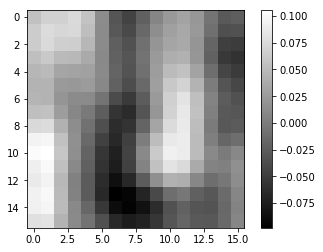

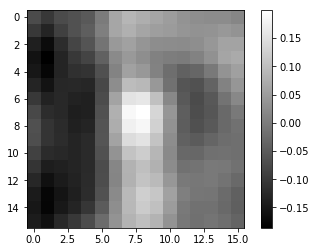

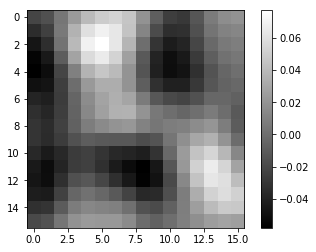

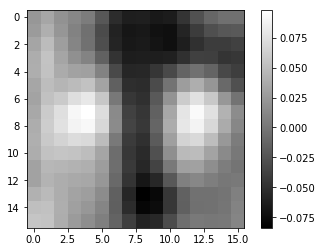

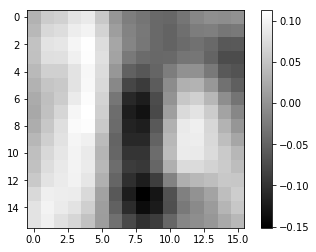

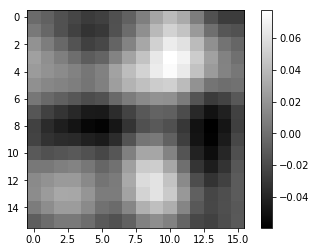

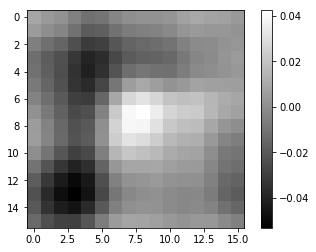

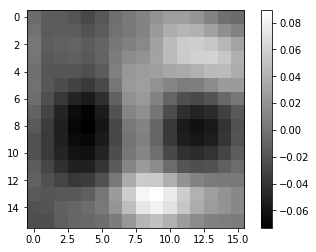

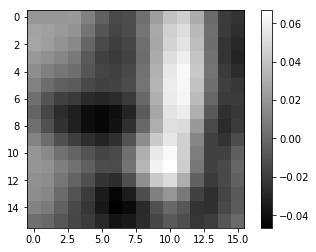

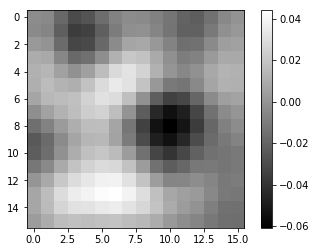

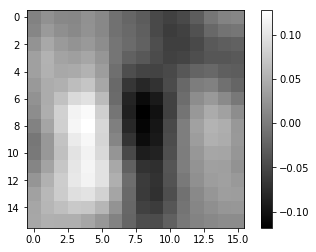

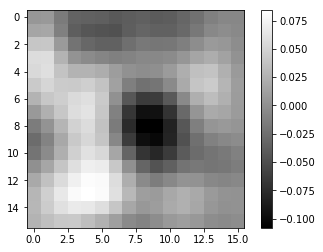

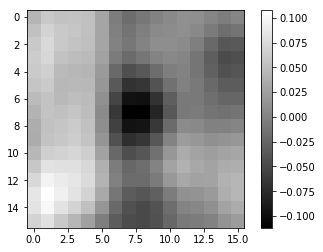

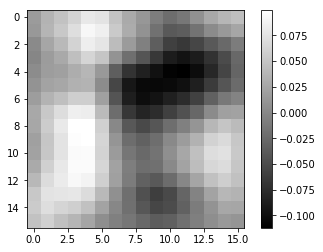

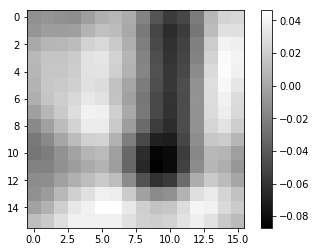

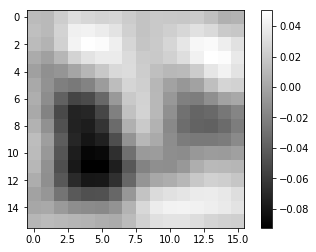

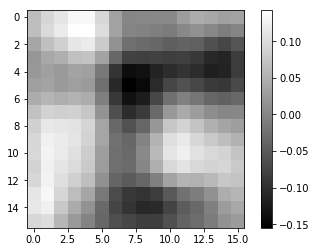

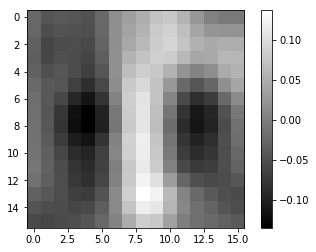

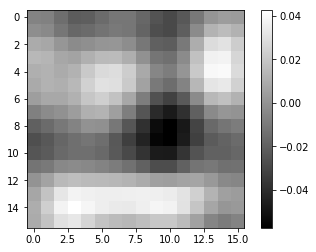

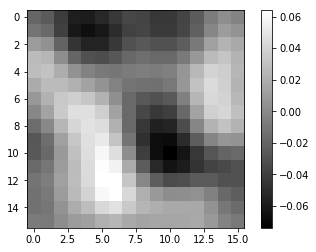

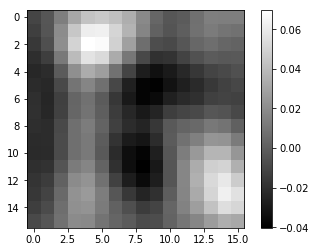

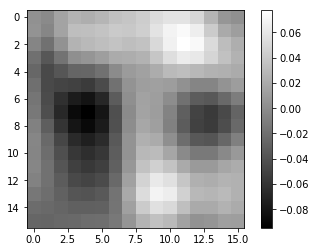

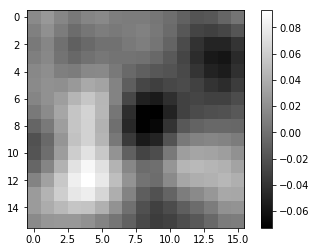

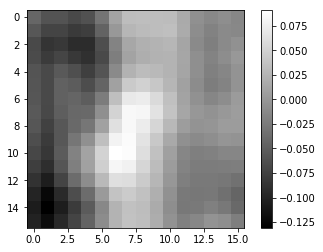

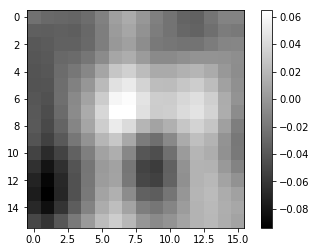

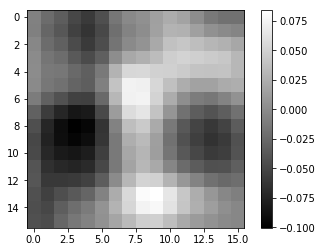

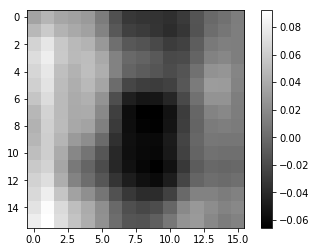

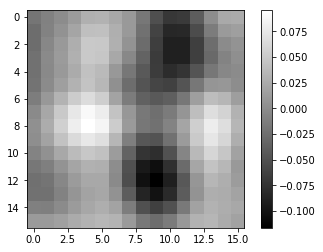

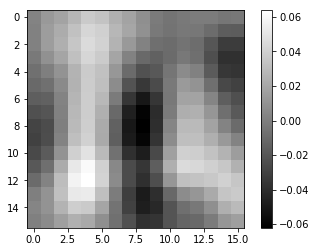

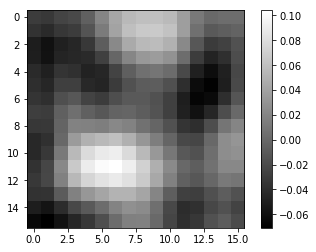

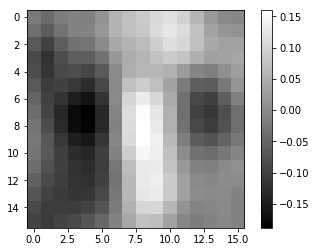

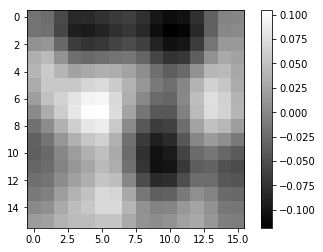

In [10]:
for i in range(32):
    u = Us[1][:,i].reshape(16,16)
    plt.figure()
    plt.imshow(u, cmap='gray')
    plt.colorbar()
    plt.show()

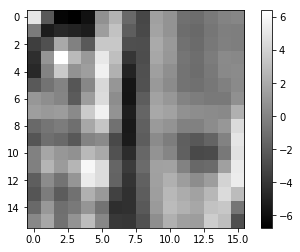

In [7]:
patch = dataset.patches[500]
for j in range(3):
    I = get_image(patch, j) * I_scale 
    
plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
patch = dataset.patches[0]    
for i in range(iteration):
    j = 0
    I = get_image(patch, j) * I_scale            
    r = rs[j]
    U = Us[j]
    Ur = U.dot(r)
    error = I - Ur
    dr = (k1 / sigma_sq) * U.T.dot(error) - 0.5 * k1 * 2.0 * alpha1 * r
    rs[j] += dr
    
    #if k % 40 == 0:
    #    k2 = k2 / 1.015
    #    print("k2={}".format(k2))        
        

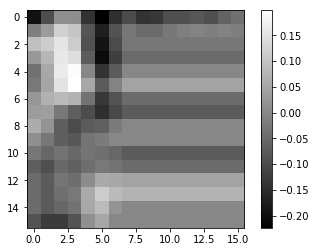

In [18]:
plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()